# Call center scheduling

In [7]:
%matplotlib inline
import gurobipy as g
import matplotlib.pyplot as plt

In [8]:
d = [6, 6, 6, 6, 6, 8, 9, 12, 18, 22, 25, 21, 21, 20, 18, 21, 21, 24, 24, 18, 18, 18, 12, 8]

In [9]:
m = g.Model()

# vars
n=len(d)
x = m.addVars(n, vtype=g.GRB.INTEGER, name="x", obj=1)
z = m.addVars(n, vtype=g.GRB.INTEGER, name="z")
# constraints
for i in range(n):
    m.addConstr(d[i] - g.quicksum(x[(i-j)%24] for j in range(8)) <= z[i])
    m.addConstr(g.quicksum(x[(i-j)%24] for j in range(8)) - d[i] <= z[i])
    m.addConstr(z[i] >= 0)

#objective
m.setObjective(g.quicksum(z[i] for i in range(24)), sense=g.GRB.MINIMIZE)

m.write("model.lp")
m.optimize()

round(m.objVal)

m.status == g.GRB.OPTIMAL

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 72 rows, 48 columns and 456 nonzeros
Model fingerprint: 0xdfddf4a8
Variable types: 0 continuous, 48 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 2e+01]
Found heuristic solution: objective 368.0000000
Presolve removed 24 rows and 0 columns
Presolve time: 0.00s
Presolved: 48 rows, 48 columns, 432 nonzeros
Variable types: 0 continuous, 48 integer (0 binary)
Found heuristic solution: objective 344.0000000

Root relaxation: objective 2.800000e+01, 31 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      28.0000000   28.00000  0.00%     -    0

True

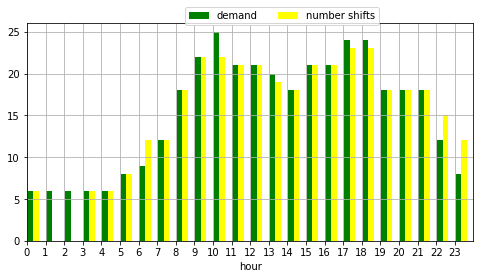

In [10]:
def plot_shifts(x_start):
    num_shifts = [sum([x_start[k % 24] for k in range(i-7, i+1)]) for i in range(24)]
    margin = 0.2
    width = 0.3
    plt.figure(figsize=(8, 4))
    plt.bar([h + margin for h in range(24)], d, width=width, color='green')
    plt.bar([h + margin + width for h in range(24)], num_shifts, width=width, color='yellow')
    plt.xlabel("hour")
    plt.legend(['demand', 'number shifts'], ncol=2, bbox_to_anchor=(0.8, 1.1))
    plt.xlim(0, 24)
    plt.ylim(0, max(num_shifts + d) + 1)
    plt.xticks(range(24), [i % 24 for i in range(24)])
    plt.grid()
    plt.show()
    
plot_shifts([x[i].x for i in range(24)])